In [1]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
import BioSPPy.biosppy.features.feature_vector as fv
import BioSPPy.biosppy.classification.supervised_learning as sl
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import BioSPPy.biosppy.classification.dissimilarity_based as db
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [2]:
# Load data
signals = pd.read_csv('BioSPPy/examples/BITALINO.csv', sep=';')
data = pd.concat((signals.A1, signals.A2, signals.A3, signals.A4)).values

In [3]:
# Get sampling rate
SR = int(signals['Sampling Rate'][0])
windows_len = 5

In [4]:
# Feature Extraction
_l = np.array([1] * len(signals.A1) + [2] * len(signals.A2) + [3] * len(signals.A3) + [4] * len(signals.A4))
window_size = int(SR * windows_len)
labels = np.array([_l[i:i + window_size][0] for i in range(0, len(_l), window_size)])[:-1]
feature_vector, data = fv.get_feat(data, sig_lab='Signal', sampling_rate=SR, windows_len=windows_len, segment=True, save=False)

<START Feature Extraction>
<END Feature Extraction>
Time:  35.4362530708313  seconds


In [5]:
# Remove redundant features
feature_vector = fv.remove_correlatedFeatures(feature_vector)

Removing Signal_abs_dev
Removing Signal_autocorr
Removing Signal_histbin_37
Removing Signal_histbin_47
Removing Signal_interquartile_range
Removing Signal_max_power_spectrum
Removing Signal_mean_abs_dev
Removing Signal_meanadiff
Removing Signal_medadiff
Removing Signal_median
Removing Signal_median_abs_dev
Removing Signal_rms
Removing Signal_sadiff
Removing Signal_spectral_histbin_18
Removing Signal_spectral_histbin_19
Removing Signal_spectral_histbin_20
Removing Signal_spectral_histbin_21
Removing Signal_spectral_histbin_27
Removing Signal_spectral_histbin_28
Removing Signal_spectral_histbin_29
Removing Signal_spectral_histbin_30
Removing Signal_spectral_histbin_31
Removing Signal_spectral_slope
Removing Signal_spectral_spread
Removing Signal_std_dev
Removing Signal_total_energy


In [6]:
# Separate in train and set set
X_train, X_test, y_train, y_test, train_data, test_data = train_test_split(feature_vector.values, labels, data, test_size=0.33, random_state=42)

In [7]:
# Fit supervised Learning Classifiers on the training set data
classifier = sl.supervised_classification(X_train, y_train)

<START Classification>
Classifier:  Nearest Neighbors
Accuracy: 72.05107129157761 +- 4.203774550717628%
-----------------------------------------
Classifier:  Decision Tree
Accuracy: 98.21469669570936 +- 1.8999571202895151%
-----------------------------------------
Classifier:  Random Forest
Accuracy: 98.47119125600139 +- 1.23831118058986%
-----------------------------------------
Classifier:  ExtraTree
Accuracy: 98.72435581296341 +- 0.800684295609556%
-----------------------------------------
Classifier:  AdaBoost
Accuracy: 97.69205478066237 +- 1.4841654186854907%
-----------------------------------------
Classifier:  GradientBoosting
Accuracy: 98.46461555322314 +- 1.4848498003961186%
-----------------------------------------
Classifier:  Gaussian NB
Accuracy: 97.95171073652087 +- 1.0121669325834204%
-----------------------------------------
Classifier:  Multinomial NB
Accuracy: 0.0 +- 0.0%
-----------------------------------------
Classifier:  Complement NB
Accuracy: 0.0 +- 0.0%
----

/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/miniconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/miniconda3/lib/python3.7/site-packages/sk

Accuracy: 28.4614120057158 +- 8.855751839337701%
-----------------------------------------
Classifier:  SVM
Accuracy: 26.926617686111353 +- 0.3087831618575583%
-----------------------------------------
Classifier:  Linear SVM


/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Accuracy: 26.653810324696394 +- 1.8461975062001839%
-----------------------------------------
Classifier:  Gaussian Process
Accuracy: 24.86850702040575 +- 0.38355661961790877%
-----------------------------------------
Classifier:  MLP
Accuracy: 26.95300480110607 +- 4.113219217176797%
-----------------------------------------
Classifier:  SGD
Accuracy: 25.641152096848298 +- 1.1162424949600867%
-----------------------------------------
Classifier:  LogisticRegression
Accuracy: 88.98257860283175 +- 6.740823208877542%
-----------------------------------------
<END Classification>
Best Classifier: ExtraTree
Accuracy: 98.72435581296341%


In [8]:
# Feature selection
FS_idx, FS_features_names, FS_X_train = fv.FSE(X_train, y_train, feature_vector.columns, classifier, CV=4)

FS_X_test = X_test[:, FS_idx]
FS_X_train = X_train[:, FS_idx]

*** Feature selection started ***
FINAL Features: ['Signal_maxdiff', 'Signal_maxAmp', 'Signal_distance', 'Signal_kurtosis', 'Signal_spectral_kurtosis']
Number of selected features 5
Features idx:  [79, 72, 76, 2, 93]
Acc:  [0.7410298539518901, 97.44555412371133, 97.97411941580756, 98.21370274914088, 98.22411941580756]
From  140  features to  5
*** Feature selection finished ***


In [9]:
# Update best classifier for the best feature set
classifier = sl.supervised_classification(FS_X_train, y_train)

<START Classification>
Classifier:  Nearest Neighbors
Accuracy: 99.74683544303798 +- 0.5063291139240506%
-----------------------------------------
Classifier:  Decision Tree
Accuracy: 96.42623199585225 +- 1.458819406821698%
-----------------------------------------
Classifier:  Random Forest
Accuracy: 97.9616164426291 +- 1.2896669787789097%
-----------------------------------------
Classifier:  ExtraTree
Accuracy: 98.97752036992543 +- 0.9499670387596101%
-----------------------------------------
Classifier:  AdaBoost
Accuracy: 76.15730261299882 +- 0.8935413686881853%
-----------------------------------------
Classifier:  GradientBoosting
Accuracy: 98.20820529681289 +- 1.2896508594799996%
-----------------------------------------
Classifier:  Gaussian NB
Accuracy: 96.15667033388551 +- 1.1326822588784866%
-----------------------------------------
Classifier:  Multinomial NB
Accuracy: 0.0 +- 0.0%
-----------------------------------------
Classifier:  Complement NB
Accuracy: 0.0 +- 0.0%
--

/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Accuracy: 37.45368555495138 +- 10.079912432537355%
-----------------------------------------
Classifier:  Gaussian Process
Accuracy: 53.33383915662396 +- 1.176136643063386%
-----------------------------------------
Classifier:  MLP
Accuracy: 30.595944140247934 +- 10.268864681080515%
-----------------------------------------
Classifier:  SGD
Accuracy: 24.3621779064817 +- 0.2793752416806469%
-----------------------------------------
Classifier:  LogisticRegression
Accuracy: 97.4487116259268 +- 2.6489837243339163%
-----------------------------------------
<END Classification>
Best Classifier: Nearest Neighbors
Accuracy: 99.74683544303798%


![title](db.pdf)

In [10]:
# Example for each data representation
# Clustering and test on the feature-based space
y_predicted = db.dissimilarity_based(FS_X_train, y_train, FS_X_test, y_test, classifier, train_signal=train_data, test_signal=test_data, clustering_space='Feature', testing_space='Feature', method='medoid', by_file=False)[0]
# Ground truth
target_names = ['Resp', 'ECG', 'EDA', 'BVP']
print('Accuracy (%): ', accuracy_score(y_test, y_predicted)*100)
print(classification_report(y_test, y_predicted, target_names=target_names))
print('\n')

Number of clusters in class label: kmin:  2 kmax:  46
Number of clusters in class label: kmin:  2 kmax:  47
Number of clusters in class label: kmin:  2 kmax:  52
Number of clusters in class label: kmin:  2 kmax:  48
Accuracy (%):  94.30051813471503
              precision    recall  f1-score   support

        Resp       0.96      0.94      0.95        53
         ECG       1.00      1.00      1.00        51
         EDA       0.89      0.95      0.92        41
         BVP       0.91      0.88      0.89        48

   micro avg       0.94      0.94      0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193





In [11]:
# Clustering on the feature-based space and test on the morphological space
y_predicted = db.dissimilarity_based(FS_X_train, y_train, FS_X_test, y_test, classifier, train_signal=train_data, test_signal=test_data, clustering_space='Feature', testing_space='Signal', method='medoid', by_file=False)[0]
print('Accuracy (%): ', accuracy_score(y_test, y_predicted)*100)
print(classification_report(y_test, y_predicted, target_names=target_names))
print('\n')

Number of clusters in class label: kmin:  2 kmax:  46
Number of clusters in class label: kmin:  2 kmax:  47
Number of clusters in class label: kmin:  2 kmax:  52
Number of clusters in class label: kmin:  2 kmax:  48
Accuracy (%):  55.44041450777202
              precision    recall  f1-score   support

        Resp       0.48      0.40      0.43        53
         ECG       0.61      0.65      0.63        51
         EDA       0.69      0.80      0.74        41
         BVP       0.43      0.42      0.42        48

   micro avg       0.55      0.55      0.55       193
   macro avg       0.55      0.57      0.56       193
weighted avg       0.54      0.55      0.55       193





In [12]:
# Clustering and test on the morphological space
y_predicted = db.dissimilarity_based(FS_X_train, y_train, FS_X_test, y_test, classifier, train_signal=train_data, test_signal=test_data, clustering_space='Signal', testing_space='Signal', method='medoid', by_file=False)[0]
print('Accuracy (%): ', accuracy_score(y_test, y_predicted)*100)
print(classification_report(y_test, y_predicted, target_names=target_names))
print('\n')

Number of clusters in class label: kmin:  2 kmax:  46
Number of clusters in class label: kmin:  2 kmax:  47
Number of clusters in class label: kmin:  2 kmax:  52
Number of clusters in class label: kmin:  2 kmax:  48
Accuracy (%):  55.44041450777202
              precision    recall  f1-score   support

        Resp       0.48      0.40      0.43        53
         ECG       0.61      0.65      0.63        51
         EDA       0.69      0.80      0.74        41
         BVP       0.43      0.42      0.42        48

   micro avg       0.55      0.55      0.55       193
   macro avg       0.55      0.57      0.56       193
weighted avg       0.54      0.55      0.55       193





In [13]:
# Majority Voting for each sensor file
# Supposing we do not know to which column the data belongs to
# Clustering and test on the feature-based space
y_predicted = db.dissimilarity_based(FS_X_train, y_train, FS_X_test, y_test, classifier, method='medoid', by_file=True)[0]
y_test_by_file = np.unique(y_test)
print('Accuracy (%): ', accuracy_score(y_test_by_file, y_predicted)*100)
print(classification_report(y_test_by_file, y_predicted, target_names=target_names))

Number of clusters in class label: kmin:  2 kmax:  46
Number of clusters in class label: kmin:  2 kmax:  47
Number of clusters in class label: kmin:  2 kmax:  52
Number of clusters in class label: kmin:  2 kmax:  48
Accuracy (%):  100.0
              precision    recall  f1-score   support

        Resp       1.00      1.00      1.00         1
         ECG       1.00      1.00      1.00         1
         EDA       1.00      1.00      1.00         1
         BVP       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



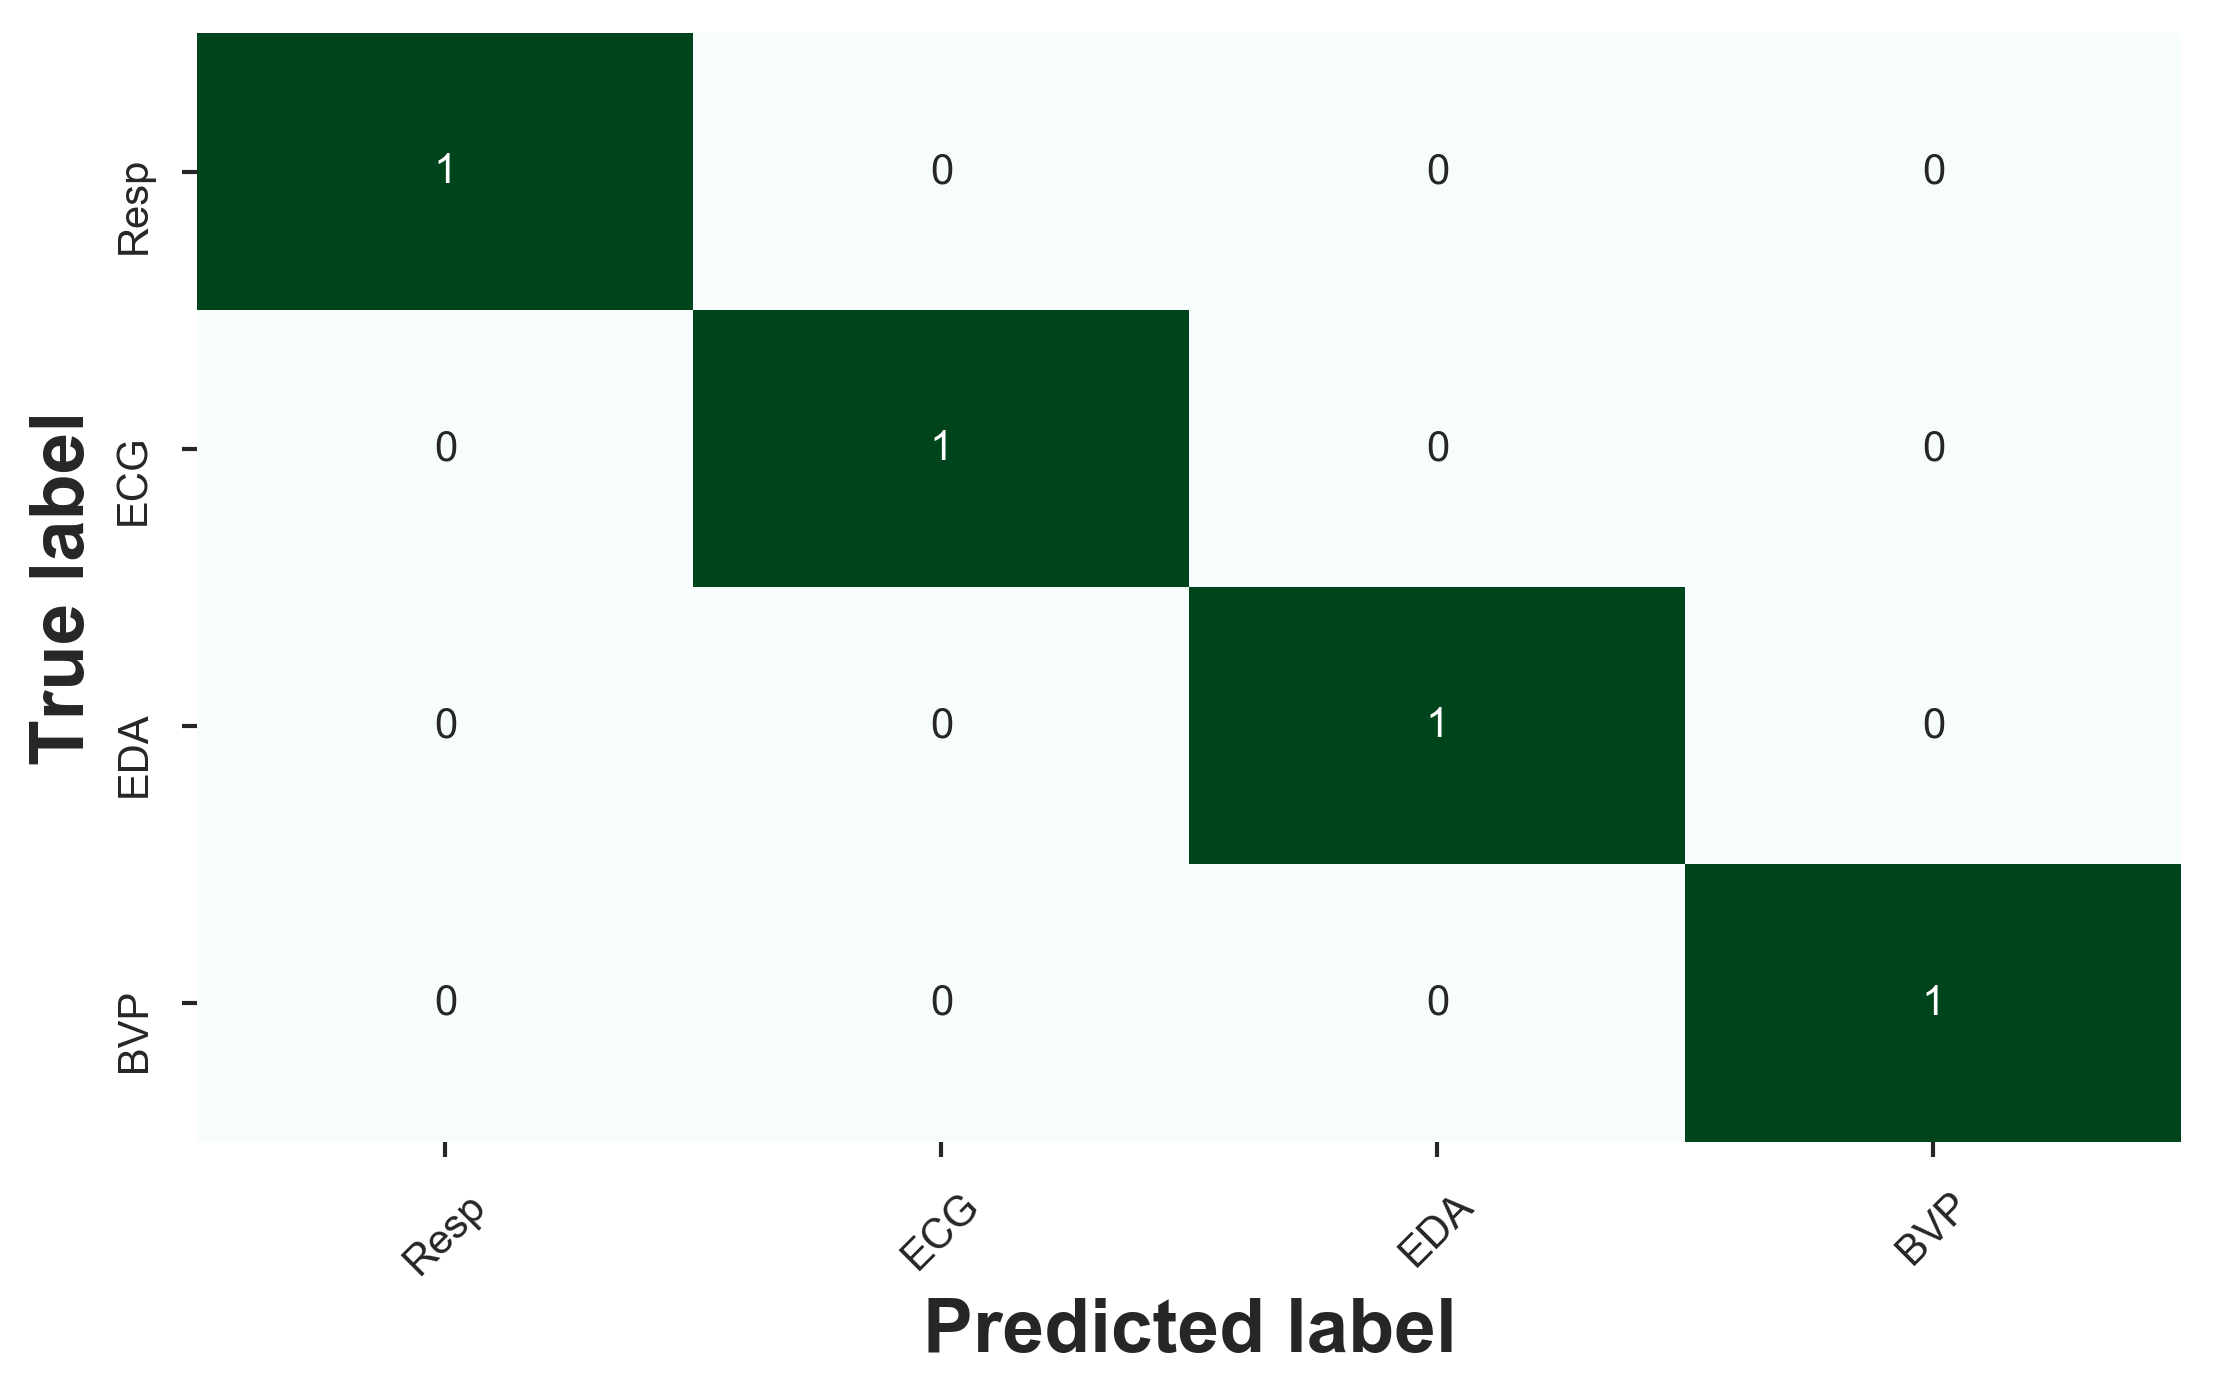

In [14]:
# Confusion Matrix
class_labels = ['Resp','ECG','EDA','BVP']
cm = confusion_matrix(y_test_by_file, y_predicted)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index=[i for i in class_labels], columns=[i for i in class_labels])
my_dpi = 300
plt.figure(figsize=(2560 / my_dpi, 1440 / my_dpi), dpi=my_dpi)
plt.tight_layout()
ax = sb.heatmap(df_cm,  cbar = False, cmap="BuGn", annot=True)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
#plt.savefig('ConfMaxtrixAP.eps', dpi=300, format='eps', bbox_inches='tight')
plt.show()